# Scipy

URL : https://youtu.be/P0Xr5TIML8U?si=eM-DjDmf7aiRK1iN

In [3]:
#importations
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import optimize

## Interpolate

### Interpolation linéaire

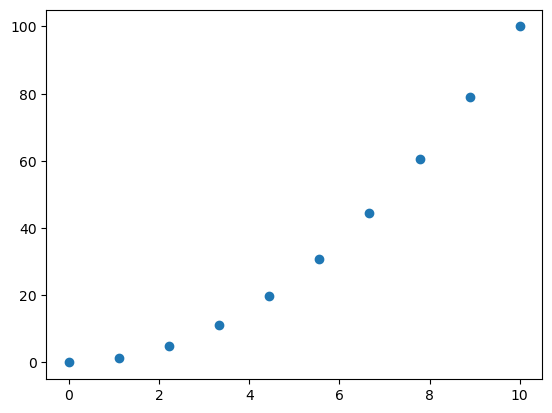

In [6]:
#définir x
#créer un tableau numpy composé de 10 valeurs allant de 0 à 10 uniformément espacés
x = np.linspace(0, 10, 10)

#définir y
y = x**2

#tracer le nuage de points y en fonction de x
plt.scatter(x, y)

- **interp1d** permet de générer une fonction d'interpolation.
- L'**interpolation** est un type d'estimation, une méthode où l'on génère de nouveaux points de données basés sur la plage d'un ensemble discret de points de données connus.

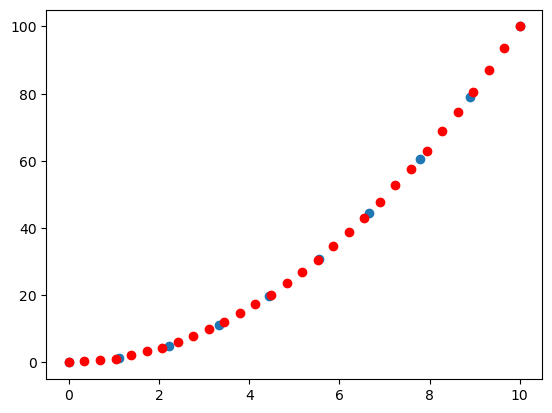

In [8]:
#créer une fonction d'interpolation f
#x et y sont les données qui doivent être interpolées
#kind='linear': le type d'interpolation, ici on a une interpolation linéaire (tracer une ligne entre 2 pts)
f = interpolate.interp1d(x, y, kind= 'linear')

#créer de nouveaux données (de l'axe des x)
#créer un tableau numpy composé de 30 valeurs allant de 0 à 10 uniformément espacés
new_x = np.linspace(0, 10, 30)

#f(new_x) et l'enregistrer dans une variable appelée new_y
new_y = f(new_x)

#tracer les graphiques (nuage de points)
#le graphique de y en fonction de x
plt.scatter(x, y)

#le graphique de new_y = f(new_x)
#couleur c='r' (red/rouge)
plt.scatter(new_x, new_y, c='r')

**Remarque:** Soyez sûr(e) que l'interpolation ne cache pas la vérité!

### Interpolation cubique

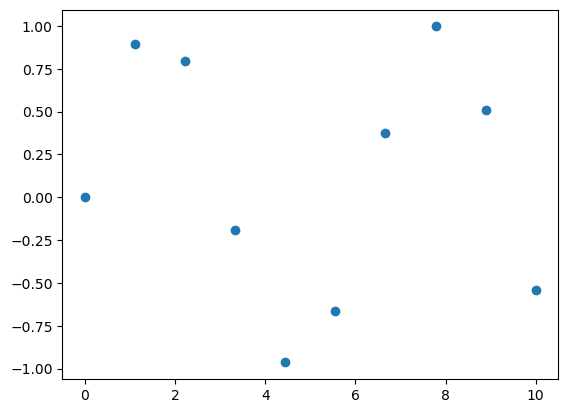

In [11]:
#définir x
#créer un tableau numpy composé de 10 valeurs allant de 0 à 10 uniformément espacés
x = np.linspace(0, 10, 10)

#définir y
y = np.sin(x)

#tracer le nuage de points y en fonction de x
plt.scatter(x, y)

On essaye l'interpolation linéaire sur ces données...

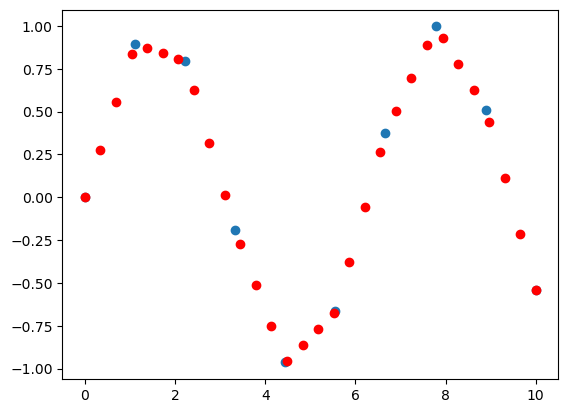

In [13]:
#créer une fonction d'interpolation f
#x et y sont les données qui doivent être interpolées
#kind='linear': le type d'interpolation, ici on a une interpolation linéaire (tracer une ligne entre 2 pts)
f = interpolate.interp1d(x, y, kind= 'linear')

#créer de nouveaux données (de l'axe des x)
#créer un tableau numpy composé de 30 valeurs allant de 0 à 10 uniformément espacés
new_x = np.linspace(0, 10, 30)

#f(new_x) et l'enregistrer dans une variable appelée new_y
new_y = f(new_x)

#tracer les graphiques (nuage de points)
#le graphique de y en fonction de x
plt.scatter(x, y)

#le graphique de new_y = f(new_x)
#couleur c='r' (red/rouge)
plt.scatter(new_x, new_y, c='r')

In [14]:
#c'est pas bon!

On utilise dans ce cas l'interpolation cubique.

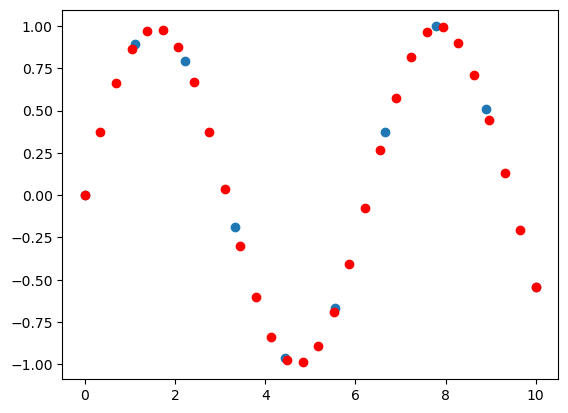

In [16]:
#créer une fonction d'interpolation f
#x et y sont les données qui doivent être interpolées
#kind='cubic': le type d'interpolation, ici on a une interpolation cubique
f = interpolate.interp1d(x, y, kind= 'cubic')

#créer de nouveaux données (de l'axe des x)
#créer un tableau numpy composé de 30 valeurs allant de 0 à 10 uniformément espacés
new_x = np.linspace(0, 10, 30)

#f(new_x) et l'enregistrer dans une variable appelée new_y
new_y = f(new_x)

#tracer les graphiques (nuage de points)
#le graphique de y en fonction de x
plt.scatter(x, y)

#le graphique de new_y = f(new_x)
#couleur c='r' (red/rouge)
plt.scatter(new_x, new_y, c='r')

In [17]:
#c'est bon!

## Optimize

### optimize.curve_fit

Elle utilise la méthode des moindres carrés pour trouver les bons paramètres d'un modèle f.

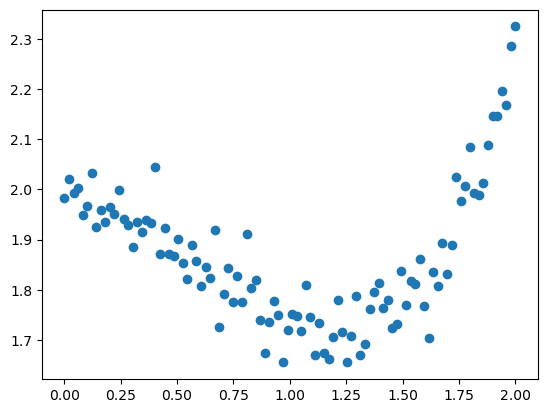

In [21]:
#définir x
#créer un tableau numpy composé de 100 valeurs allant de 0 à 2 uniformément espacés
x = np.linspace(0, 2, 100)

#définir y (polynôme de degré 3 + du bruit)
#np.random.randn(): cette partie produit un tableau de nombres aléatoires d'une distribution normale
#x.shape[0] obtient le nombre de lignes dans le tableau x
y = 1/3*x**3 - 3/5*x**2 + 2 + np.random.randn(x.shape[0])/20

#tracer le nuage de points y en fonction de x
plt.scatter(x, y)

In [22]:
#définir le modèle f
#f(x)=ax^3 + bx² + cx + d
def f(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In [23]:
#utiliser optimize.curve_fit() pour définir les paramètres du modèle f
optimize.curve_fit(f, x, y)

(array([ 0.34308307, -0.63596774,  0.04641654,  1.97913809]),
 array([[ 0.00092987, -0.00278962,  0.0022205 , -0.00036075],
        [-0.00278962,  0.0086126 , -0.00714899,  0.00124312],
        [ 0.0022205 , -0.00714899,  0.00634374, -0.00124947],
        [-0.00036075,  0.00124312, -0.00124947,  0.00033495]]))

In [24]:
"""on obtient 2 tableaux numpy:
- 1er tableau:
dont les valeurs correspondent aux paramètres: a, b, c et d du modèle f.
- 2ème tableau:
dont les valeurs correspondent aux covariances qu'ils y a entre les différents paramètres du modèle f.
En d'autres termes, c'est la matrice de covariance du modèle f.
"""

"on obtient 2 tableaux numpy:\n- 1er tableau:\ndont les valeurs correspondent aux paramètres: a, b, c et d du modèle f.\n- 2ème tableau:\ndont les valeurs correspondent aux covariances qu'ils y a entre les différents paramètres du modèle f.\nEn d'autres termes, c'est la matrice de covariance du modèle f.\n"

In [25]:
#enregistrer les 2 tableaux obtenus dans 2 variables appelées params et param_cov
params, param_cov = optimize.curve_fit(f, x, y)

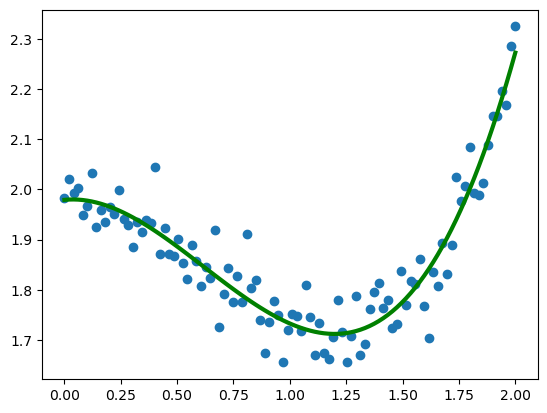

In [26]:
#afficher le nuage de points y en fonction de x
plt.scatter(x, y)

#tracer le modèle f(x)=ax^3 + bx² + cx + d
#params[0], params[1], params[2], params[3] correspondent aux paramètres du modèle f dans params
#avec: couleur du graphique c='g' et épaisseur de ligne lw=3
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

**Remarque:** Le mieux est de faire ça avec **Sklearn** parce qu'il est plus performant.

## Minimize

A partir d'un point x0, la fonction minimize() execute un algorithme de minimization qui, peu à peu, va converger vers le 1er minimum qu'il rencontre.

In [30]:
#définir la fonction f
#f(x)= x² + 15 sin(x)
def f(x):
    return x**2 + 15*np.sin(x)

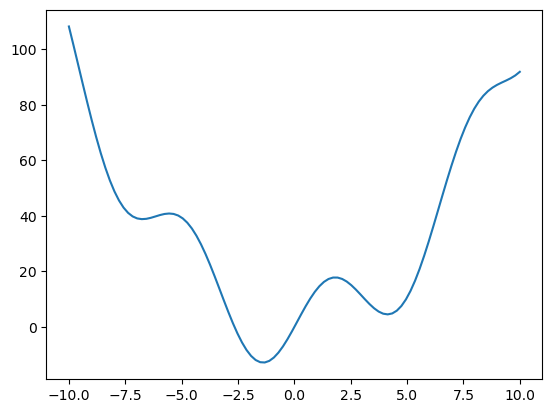

In [31]:
#définir x
#créer un tableau numpy composé de 100 valeurs allant de -10 à 10 uniformément espacés
x = np.linspace(-10, 10, 100)

#tracer le graphique f(x) en fonction de x
plt.plot(x, f(x))

In [32]:
#utiliser optimize.minimize() pour trouver le 1er minimum après x0=-8 dans f(x)
optimize.minimize(f, x0=-8)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 38.81120617595851
        x: [-6.738e+00]
      nit: 6
      jac: [ 4.768e-07]
 hess_inv: [[ 1.164e-01]]
     nfev: 14
     njev: 7

In [33]:
#x: [-6.738e+00] correspont à la coodonée du 1er minimum (x = -6.738)
#dans le graphique, on voit que ça correspond à un minimum local

In [34]:
#si on veut, par exemple, savoir où se situe le minimum global
#on peut juste changer la valeur de X0:

#d'après le graphique, on voit que le minimum global vient après x=-5
#utiliser optimize.minimize() pour trouver le minimum global après x0=-2 dans f(x)
optimize.minimize(f, x0=-5)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -12.823616887804414
        x: [-1.385e+00]
      nit: 4
      jac: [ 3.695e-06]
 hess_inv: [[ 5.979e-02]]
     nfev: 18
     njev: 9

In [35]:
#le minimum global correspond à la valeur de x=-1.385

In [36]:
#pour accéder à la valeur de x
optimize.minimize(f, x0=-5).x

array([-1.38505583])

In [37]:
#enregistrer cette valeur dans une variable appelée x_min
x_min = optimize.minimize(f, x0=-5).x

In [38]:
#définir X0
x0=-5

#définir x_min
x_min = optimize.minimize(f, x0=x0).x

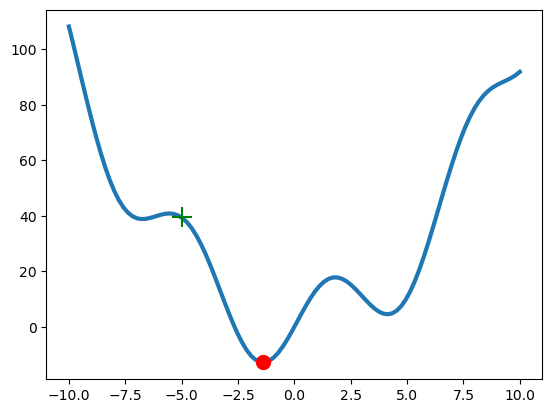

In [39]:
#tracer la fonction f(x) avec une largeur de ligne (lw) de 3 et un ordre de tracé inférieur  
#zorder=-1 : Cela détermine l'ordre d'affichage des éléments
#Les éléments avec un zorder plus élevé sont affichés au-dessus de ceux avec un zorder inférieur
#ici, la ligne est dessinée en dessous des deux points
plt.plot(x, f(x), lw=3, zorder=-1)  

#afficher le point de x = x_min (minimum global)
#en rouge (c='r') et la taille du point est de 100 (s=100)
#zorder=1 : donc ce point sera affiché au-dessus de la ligne de f(x)
plt.scatter(x_min, f(x_min), s=100, c='r', zorder=1)  

#afficher le point de x = x0
#en vert (c='g'), la taille du point est de 200 (s=200) et le marqueur est un '+' (marker='+')
#zorder=1 : donc ce point sera affiché au-dessus de la ligne de f(x)
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1)

On peut même utiliser ça avec des fonctions à 2D ou 3D.

**Exemple:** fonction à 2D

In [41]:
#définir f(x)
#x[0] correspond au 1er élément de x
#x[1] correspond au 2ème élément de x
def f(x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

In [42]:
#créer un ensemble de 100 points allant de -3 à 3
np.linspace(-3, 3, 100)

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

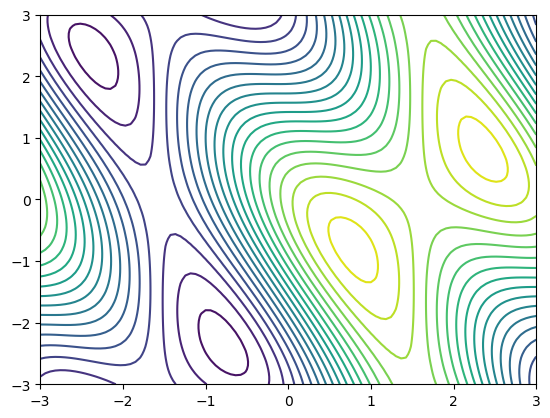

In [43]:
#définir x
x = np.linspace(-3, 3, 100)

#définir y
y = np.linspace(-3, 3, 100)

#créer une grille à partir des 2 axes x et y
x, y = np.meshgrid(x,y)

#contour plot de f(np.array([x,y]), en vue du dessus
#avec 20 niveaux, pour augmenter la précision de l'affichage du graphique
plt.contour(x, y, f(np.array([x,y])), 20)

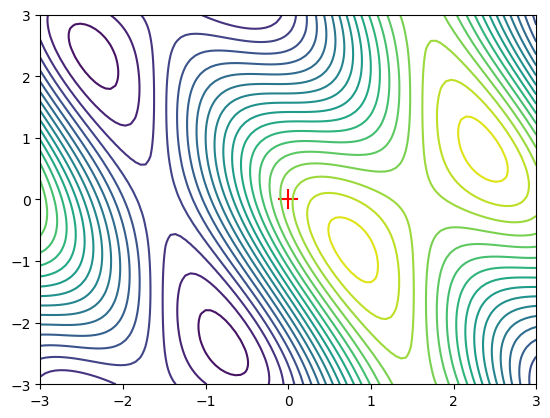

In [44]:
#contour plot de f(np.array([x,y]), en vue du dessus
#avec 20 niveaux, pour augmenter la précision de l'affichage du graphique
plt.contour(x, y, f(np.array([x,y])), 20)

#définir x0
x0=np.array([0,0])

#afficher le point de x = x0 dans le contour plot

#x0[0] correspond au 1er élément de x0
##x0[0] correspond au 2ème élément de x0
#en rouge (c='g'), un marqueur + (marker='+') et la taille du point est de 100 (s=100)
plt.scatter(x0[0], x0[1], marker='+', c='r', s=200)

In [45]:
#définir x0
x0 = np.array([0,0])

#utiliser optimize.minimize() pour trouver le minimum  après x0 = np.array([0,0])
optimize.minimize(f, x0=x0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.414213562372366
        x: [-7.854e-01 -2.356e+00]
      nit: 9
      jac: [-1.356e-06  5.960e-08]
 hess_inv: [[ 7.147e-01 -7.204e-01]
            [-7.204e-01  2.141e+00]]
     nfev: 87
     njev: 29

In [46]:
#accéder à la valeur de x et l'enregistrer sous une variable appelée x_min
x_min = optimize.minimize(f, x0=x0).x

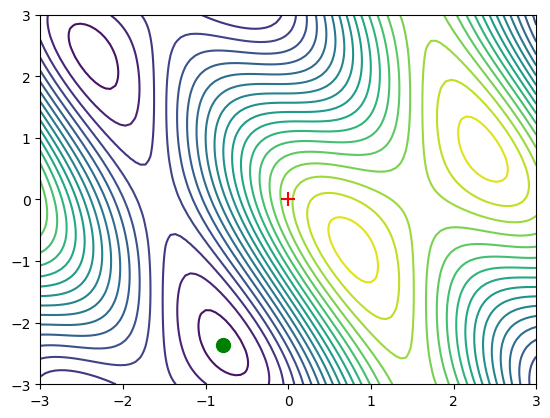

In [80]:
#contour plot de f(np.array([x,y]), en vue du dessus
#avec 20 niveaux, pour augmenter la précision de l'affichage du graphique
#zorder=-1 : Cela détermine l'ordre d'affichage des éléments
#Les éléments avec un zorder plus élevé sont affichés au-dessus de ceux avec un zorder inférieur
#ici, le contour plot est dessinée en dessous des deux points
plt.contour(x, y, f(np.array([x,y])), 20, zorder=-1)

#afficher le point de x = x0 dans le contour plot

#x0[0] correspond au 1er élément de x0
#x0[0] correspond au 2ème élément de x0
#en rouge (c='g'), un marqueur + (marker='+') et la taille du point est de 100 (s=100)
#zorder=1 : donc ce point sera affiché au-dessus du contour plot de f(np.array([x,y])
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100, zorder=1)

#afficher le point de x = x_min (minimum global) dans le contour plot

#x_min[0] correspond au 1er élément de x_min
#x_min[0] correspond au 2ème élément de x_min
#en vert (c='g') et la taille du point est de 100 (s=100)
#zorder=1 : donc ce point sera affiché au-dessus du contour plot de f(np.array([x,y])
plt.scatter(x_min[0], x_min[1], c='g', s=100,  zorder=1)